In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
X=dataset.iloc[:,1:2]
Y=dataset.iloc[:,2:3]
print(X)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [3]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(random_state=0)
reg.fit(X,Y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [6]:
y_pred=reg.predict(6.5)
print(y_pred)

[150000.]


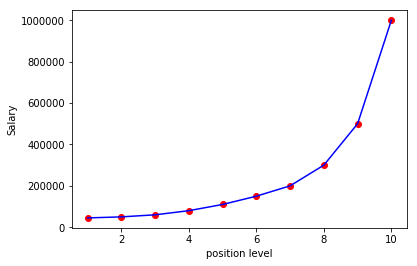

In [7]:
plt.scatter(X,Y, color='red')
plt.plot(X, reg.predict(X), color= 'blue')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X=sc_X.fit_transform(X)
Y=sc_Y.fit_transform(Y)

In [10]:
regg=DecisionTreeRegressor(random_state=0)
regg.fit(X,Y)
#predicting
ypred= sc_Y.inverse_transform(regg.predict(sc_X.transform(np.array([[6.5]]))))
#inverse scaling for the value
print(ypred)

[150000.]


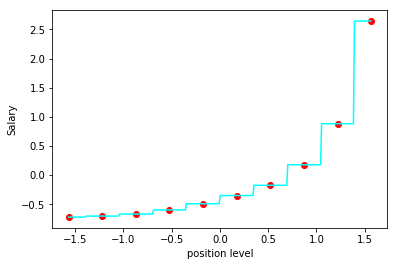

In [13]:
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y, color='red')
plt.plot(X_grid, regg.predict(X_grid), color='cyan')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()